<a href="https://colab.research.google.com/github/cdstreiff/MAT421---Applied-Computational-Methods/blob/main/MAT421SectionHPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Section H HW - MAT 421
## Part 2
### Carson Streiff

## Logistics functions
The logistic function tracks the size of a population P over time with a given carrying capacity K.

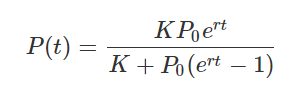

In this program we test scipy's built-in numerical differential equation solver with a logistic curve, knowing that the derivative of the logistic function is given as

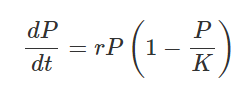

The algorithm performed so well that it is difficult to see the difference between the numerically evaluated plot and the exact analytical plot.

Text(0.5, 1.0, 'Exact solution')

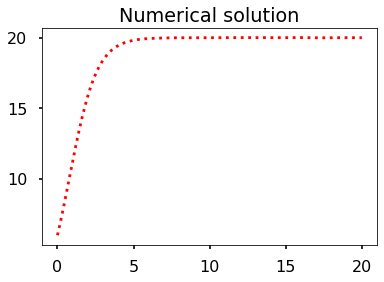

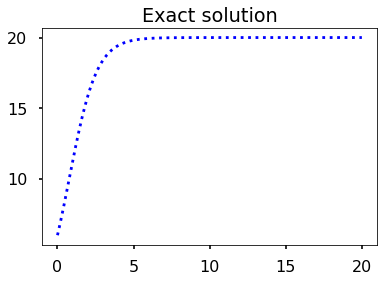

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

%matplotlib inline

#creating our function
dP = lambda t, P: r*P*(1 - P/K)

#initial conditions
t0 = 0
tf = 20
P0 = 6
r = 1.1
K = 20
t = np.linspace(0, 20, 2001)

#calling scipy's initial value problem solver
sol = solve_ivp(dP,[t0,tf],[P0],t_eval = t)


#plot vs analytical solution
plt.plot(sol.t,sol.y[0],'r:')
plt.title('Numerical solution')

y_exact = (K * P0 * np.exp(r*t)) / (K + P0 * (np.exp(r*t) - 1))
plt.figure()
plt.plot(t,y_exact,'b:')
plt.title('Exact solution')

## Lorenz Attractor
The Lorenz attractor is a so-called "strange attractor", a mathematical structure with chaotic behavior. It is defined rather simply however, by a set of ODE's:

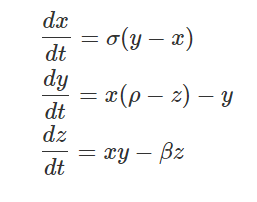

This program evaluates and plots a Lorenz attractor using scipy's numerical integration feature.

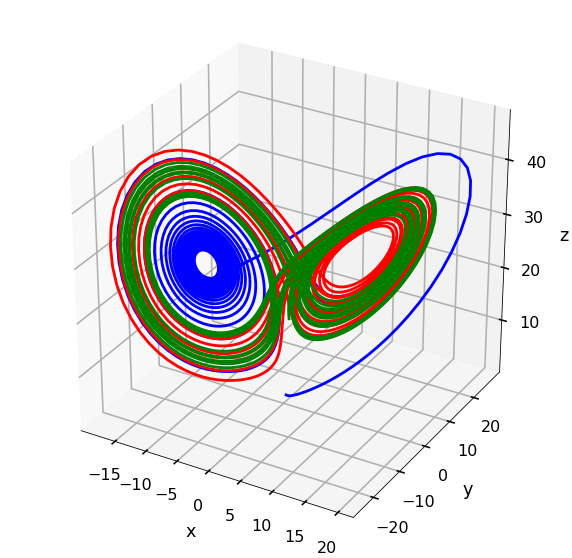

In [ ]:

def my_lorenz(t,S,sigma,rho,beta):

  #evaluate the derivatives in each dimension
  dx = sigma * (S[1] - S[0])
  dy = S[0] * (rho - S[2]) - S[1]
  dz = S[0]*S[1] - beta * S[2]

  dS = [dx,dy,dz]
  return dS

def my_lorenz_solver(t_span,s0,sigma,rho,beta):

  #create function for solve_ivp
  F = lambda t,s: my_lorenz(t,s,sigma,rho,beta)

  #create time points array to evaluate at
  t_eval = np.arange(0,50,0.01)

  #run solve_ivp
  sol = solve_ivp(F,t_span,s0,t_eval=t_eval)

  return [sol.t,sol.y[0],sol.y[1],sol.y[2]]

#initial conditions and constants
sigma = 10
rho = 28
beta = 8/3
t0 = 0
tf = 50
s0 = np.array([0, 1, 1.05])

#call our function
[T,X,Y,Z] = my_lorenz_solver([t0, tf], \
                        s0, sigma, rho, beta)


from mpl_toolkits import mplot3d

#plot attractor
fig = plt.figure(figsize = (10,10))
ax = plt.axes(projection='3d')
ax.grid()

#different colors
ax.plot3D(X[0:1600], Y[0:1600], Z[0:1600],'b')
ax.plot3D(X[1601:3200], Y[1601:3200], Z[1601:3200],'r')
ax.plot3D(X[3201:4999], Y[3201:4999], Z[3201:4999],'g')

#axes labels
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

plt.show()

## Mass-Spring-Damper
This program simulates the displacement of a mass-spring-damper system, like this:

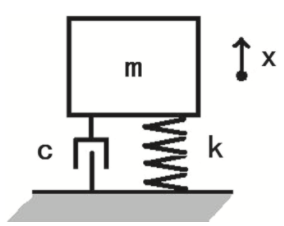

The acceleration of the mass is given by:

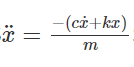

We use Euler's method to solve this system. As we can see the damping slowly decreases the displacement of the mass over time.

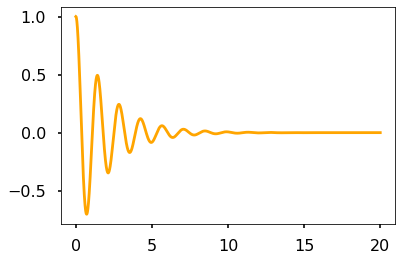

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#constants that can be altered
m = 1
c = 1
k = 20

#start time, stop time, timestep
a = 0
b = 20
h = 0.0001

#initial displacement
t = np.arange(a,b+h,h)
x = np.zeros(len(t))
x[0] = 1

#initial velocity
v = np.zeros(len(t))
v[0] = 0


#derivative of v
dv = lambda x, v: - (c*v + k*x) / m
        

#loop through
for i in range(0,len(t) - 1):

  #evaluate new velocity
  v[i+1] = v[i] + h * dv(x[i],v[i])

  #use those new displacement
  x[i+1] = x[i] + h * v[i]

#plot
plt.plot(t,x,color='orange')
